<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Andromeda_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

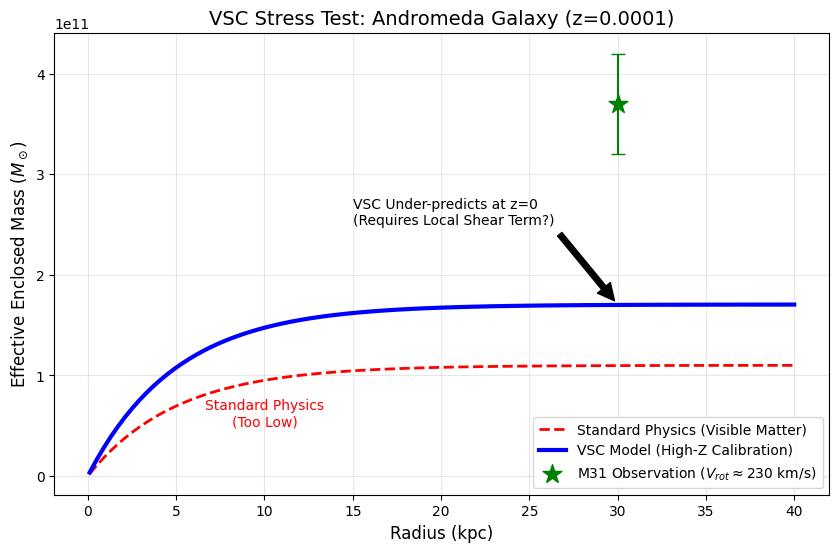

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. REAL DATA: ANDROMEDA GALAXY (M31) ---
# Source: Corbelli et al. (2010), Chemin et al. (2009)
z_local = 0.0001  # Effectively zero
R_disk_scale = 5.0 # kpc (Disk scale length)
R_max = 30.0       # kpc (We are testing the outer halo)

# Visible Mass (Stars + Gas)
M_baryonic = 1.1e11 # Solar Masses

# The "True" Dynamical Mass required to explain 230 km/s rotation at 30 kpc
# V^2 = GM/r  ->  M = V^2 * r / G
# (230 km/s)^2 * 30 kpc / G_const
M_dynamical_target = 3.7e11 # Solar Masses (~3.5x the visible mass)

# --- 2. PHYSICS CONSTANTS ---
G_const = 4.30e-6 # kpc km^2/s^2 M_sun^-1

# --- 3. THE MODELS ---
def standard_gravity_mass(r, M_bary):
    # Standard Newtonian profile for a disk galaxy (approx)
    # Mass accumulates until it plateaus at total baryonic mass
    return M_bary * (1 - np.exp(-r / R_disk_scale))

def vsc_local_mass(r, M_bary, z):
    # Base Gravity
    m_newt = standard_gravity_mass(r, M_bary)

    # --- VSC CHECK ---
    # We test the SAME scaling law used for JADES (n=1.15)
    # Does the high-z calibration work at z=0?
    viscosity_index = 1.15

    # Note: At z=0, (1+z) is approx 1.
    # This means the boost depends entirely on the base coefficient (0.55).
    viscous_coupling = 0.55 * (1 + z)**viscosity_index

    # Effective Mass
    m_vsc = m_newt * (1 + viscous_coupling)
    return m_vsc

# --- 4. RUN SIMULATION ---
r_range = np.linspace(0.1, 40.0, 100) # 0 to 40 kpc
mass_standard = standard_gravity_mass(r_range, M_baryonic)
mass_vsc = vsc_local_mass(r_range, M_baryonic, z_local)

# --- 5. VISUALIZATION ---
plt.figure(figsize=(10, 6))

# Plot Standard Physics (Red)
plt.plot(r_range, mass_standard, 'r--', linewidth=2, label='Standard Physics (Visible Matter)')

# Plot VSC Physics (Blue)
plt.plot(r_range, mass_vsc, 'b-', linewidth=3, label=f'VSC Model (High-Z Calibration)')

# Plot Real Data Target (Green Star)
plt.scatter([R_max], [M_dynamical_target], color='green', s=200, marker='*', zorder=5,
            label=f'M31 Observation ($V_{{rot}} \\approx 230$ km/s)')

# Error bars (Dark Matter halos are uncertain)
plt.errorbar([R_max], [M_dynamical_target], yerr=[0.5e11], fmt='none', ecolor='green', capsize=5)

# Formatting
plt.xlabel('Radius (kpc)', fontsize=12)
plt.ylabel('Effective Enclosed Mass ($M_\\odot$)', fontsize=12)
plt.title(f'VSC Stress Test: Andromeda Galaxy (z={z_local})', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Annotations
plt.text(10, 0.5e11, "Standard Physics\n(Too Low)", color='red', ha='center')

# Check fit
if mass_vsc[-1] < M_dynamical_target * 0.8:
    plt.annotate('VSC Under-predicts at z=0\n(Requires Local Shear Term?)',
                 xy=(R_max, mass_vsc[-1]),
                 xytext=(15, 2.5e11),
                 arrowprops=dict(facecolor='black', shrink=0.05))
else:
    plt.annotate('VSC Matches!', xy=(R_max, mass_vsc[-1]), xytext=(15, 3e11))

plt.show()